In [27]:
# 1)  libraries and set random seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import seaborn as sns
import datetime

from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)

In [2]:
# 2) import and process datasets
kew_2015 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2015.csv', index_col=0)
kew_2016 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2016.csv', index_col=0)
kew_2017 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2017.csv', index_col=0)
kew_2018 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2018.csv', index_col=0)
kew_2019 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2019.csv', index_col=0)
kew_2020 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Kew\midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00723_kew-gardens_qcv-1_2020.csv', index_col=0)

heath_2015 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2015.csv', index_col=0)
heath_2016 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2016.csv', index_col=0)
heath_2017 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2017.csv', index_col=0)
heath_2018 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2018.csv', index_col=0)
heath_2019 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2019.csv', index_col=0)
heath_2020 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2020.csv', index_col=0)

kew_2015 = kew_2015[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2016 = kew_2016[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2017 = kew_2017[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2018 = kew_2018[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2019 = kew_2019[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
kew_2020 = kew_2020[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]

heath_2015 = heath_2015[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2016 = heath_2016[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2017 = heath_2017[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2018 = heath_2018[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2019 = heath_2019[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]
heath_2020 = heath_2020[["wind_direction", "wind_speed", "air_temperature", "dewpoint", "wetb_temp", "rltv_hum"]]

kew_2015.index = pd.to_datetime(kew_2015.index, format='%d/%m/%Y %H:%M')
kew_2016.index = pd.to_datetime(kew_2016.index, format='%d/%m/%Y %H:%M')
kew_2017.index = pd.to_datetime(kew_2017.index, format='%d/%m/%Y %H:%M')
kew_2018.index = pd.to_datetime(kew_2018.index, format='%d/%m/%Y %H:%M')
kew_2019.index = pd.to_datetime(kew_2019.index, format='%d/%m/%Y %H:%M')
kew_2020.index = pd.to_datetime(kew_2020.index, format='%d/%m/%Y %H:%M')

heath_2015.index = pd.to_datetime(heath_2015.index, format='%d/%m/%Y %H:%M')
heath_2016.index = pd.to_datetime(heath_2016.index, format='%d/%m/%Y %H:%M')
heath_2017.index = pd.to_datetime(heath_2017.index, format='%d/%m/%Y %H:%M')
heath_2018.index = pd.to_datetime(heath_2018.index, format='%d/%m/%Y %H:%M')
heath_2019.index = pd.to_datetime(heath_2019.index, format='%d/%m/%Y %H:%M')
heath_2020.index = pd.to_datetime(heath_2020.index, format='%d/%m/%Y %H:%M')

idx_2015 = pd.date_range('2015/01/01-00:00:00', '2015/12/31 23:00:00	', freq="60min")
idx_2016 = pd.date_range('2016/01/01-00:00:00', '2016/12/31 23:00:00	', freq="60min")
idx_2017 = pd.date_range('2017/01/01-00:00:00', '2017/12/31 23:00:00	', freq="60min")
idx_2018 = pd.date_range('2018/01/01-00:00:00', '2018/12/31 23:00:00	', freq="60min")
idx_2019 = pd.date_range('2019/01/01-00:00:00', '2019/12/31 23:00:00	', freq="60min")
idx_2020 = pd.date_range('2020/01/01-00:00:00', '2020/12/31 23:00:00	', freq="60min")

kew_2015 = kew_2015.reindex(idx_2015, fill_value=0)
heath_2015 = heath_2015.reindex(idx_2015, fill_value=0)

kew_2016 = kew_2016.reindex(idx_2016, fill_value=0)
heath_2016 = heath_2016.reindex(idx_2016, fill_value=0)

kew_2017 = kew_2017.reindex(idx_2017, fill_value=0)
heath_2017 = heath_2017.reindex(idx_2017, fill_value=0)

kew_2018 = kew_2018.reindex(idx_2018, fill_value=0)
heath_2018 = heath_2018.reindex(idx_2018, fill_value=0)

kew_2019 = kew_2019.reindex(idx_2019, fill_value=0)
heath_2019 = heath_2019.reindex(idx_2019, fill_value=0)

kew_2020 = kew_2020.reindex(idx_2020, fill_value=0)
heath_2020 = heath_2020.reindex(idx_2020, fill_value=0)

kew_2015 = kew_2015.fillna(value=kew_2015.mean())
kew_2016 = kew_2016.fillna(value=kew_2015.mean())
kew_2017 = kew_2017.fillna(value=kew_2015.mean())
kew_2018 = kew_2018.fillna(value=kew_2015.mean())
kew_2019 = kew_2019.fillna(value=kew_2015.mean())
kew_2020 = kew_2020.fillna(value=kew_2015.mean())

heath_2015 = heath_2015.fillna(value=kew_2015.mean())
heath_2016 = heath_2016.fillna(value=kew_2015.mean())
heath_2017 = heath_2017.fillna(value=kew_2015.mean())
heath_2018 = heath_2018.fillna(value=kew_2015.mean())
heath_2019 = heath_2019.fillna(value=kew_2015.mean())
heath_2020 = heath_2020.fillna(value=kew_2015.mean())

kew_2015_2020 = pd.concat([kew_2015, kew_2016, kew_2017, kew_2018, kew_2019, kew_2020])
heath_2015_2020 = pd.concat([heath_2015, heath_2016, heath_2017, heath_2018, heath_2019, heath_2020])
kew_2015_2020 = kew_2015_2020.add_suffix('_kew')
heath_2015_2020 = heath_2015_2020.add_suffix('_heath')
heath_kew_2015_2020 = pd.concat([kew_2015_2020, heath_2015_2020], axis=1)
df = heath_kew_2015_2020

C:\Users\gabri\AppData\Local\Temp\ipykernel_22764\1940472681.py:9: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  heath_2015 = pd.read_csv(r'C:\Users\gabri\VSCode Projects\Weather Prediction\Datasets\Heathrow/midas-open_uk-hourly-weather-obs_dv-202107_greater-london_00708_heathrow_qcv-1_2015.csv', index_col=0)


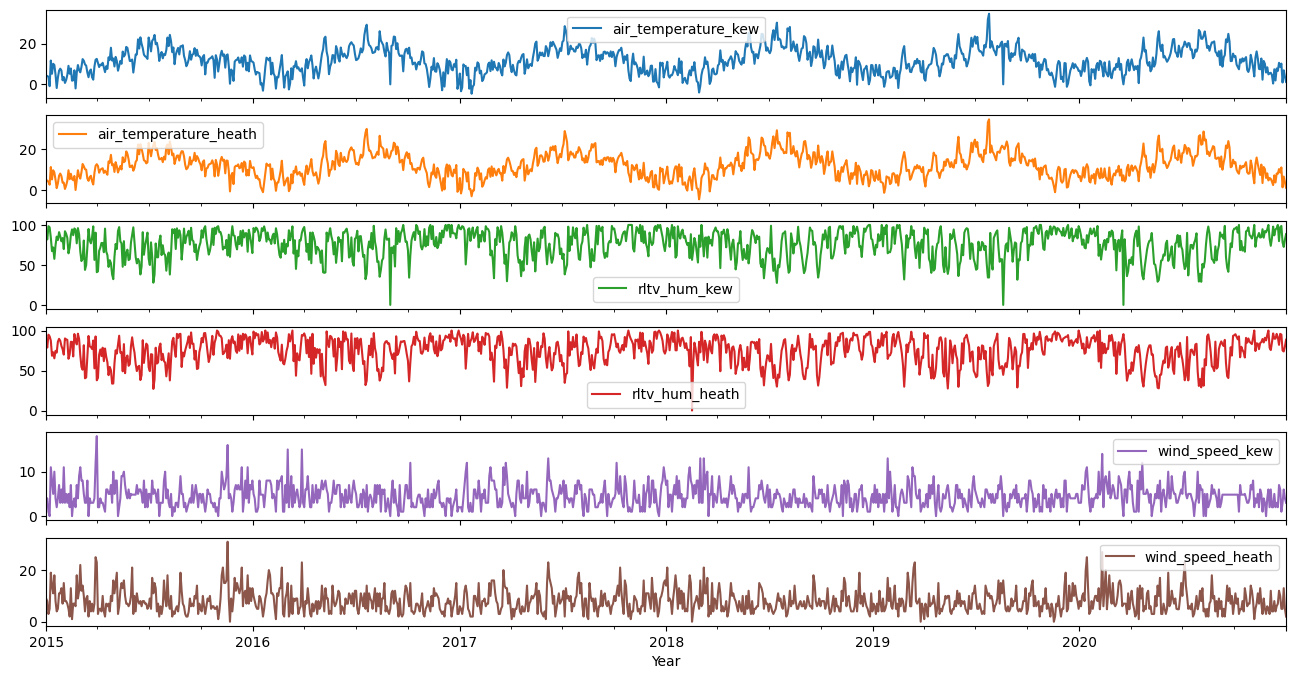

In [6]:
# 2) Trends, visualisation

plt.rcParams["figure.figsize"] = (16, 8)

#df[['air_temperature_kew', 'air_temperature_heath', 'rltv_hum_kew', 'rltv_hum_heath','wind_speed_heath', 'wind_speed_kew']][::50].plot(xlabel='Year', subplots=True)
df[['air_temperature_kew', 'air_temperature_heath', 'rltv_hum_kew', 'rltv_hum_heath', 'wind_speed_kew', 'wind_speed_heath']
   ][::50].plot(xlabel='Year', subplots=True)
plt.show()


c:\Users\gabri\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
c:\Users\gabri\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
c:\Users\gabri\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
c:\Users\gabri\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
c:\Users\gabri\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
c:\Users\gabri\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:1191: UserWarning: The following kwargs were not used b

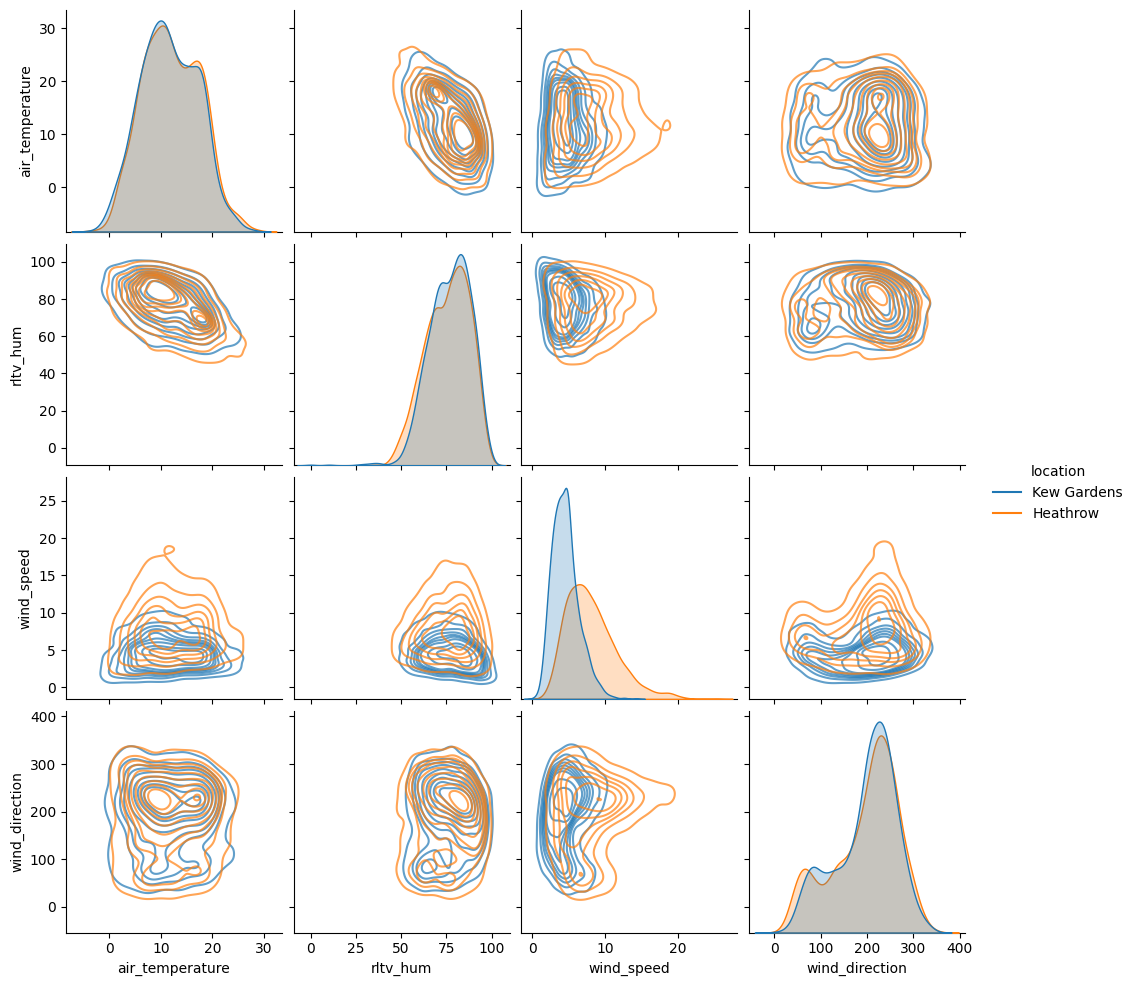

In [10]:
# 3) plot dsitributions, effects of resampling on distribution

#@title
columns = ['air_temperature', 'rltv_hum',
           'wind_speed', 'wind_direction', 'location']

df1 = pd.DataFrame(columns=columns)
df2 = pd.DataFrame(columns=columns)

df1['air_temperature'] = df['air_temperature_kew'].resample('24H').mean()
df1['rltv_hum'] = df['rltv_hum_kew'].resample('24H').mean()
df1['wind_speed'] = df['wind_speed_kew'].resample('24H').mean()
df1['wind_direction'] = df['wind_direction_kew'].resample('24H').mean()
df1['location'] = 'Kew Gardens'

df2['air_temperature'] = df['air_temperature_heath'].resample('24H').mean()
df2['rltv_hum'] = df['rltv_hum_heath'].resample('24H').mean()
df2['wind_speed'] = df['wind_speed_heath'].resample('24H').mean()
df2['wind_direction'] = df['wind_direction_heath'].resample('24H').mean()
df2['location'] = 'Heathrow'

pairplot = pd.concat([df1, df2])
pairplot = pairplot.reset_index()

sns.pairplot(pairplot,
             kind="kde",
             hue="location",
             plot_kws=dict(s=10, alpha=0.7))

plt.show()

<AxesSubplot: >

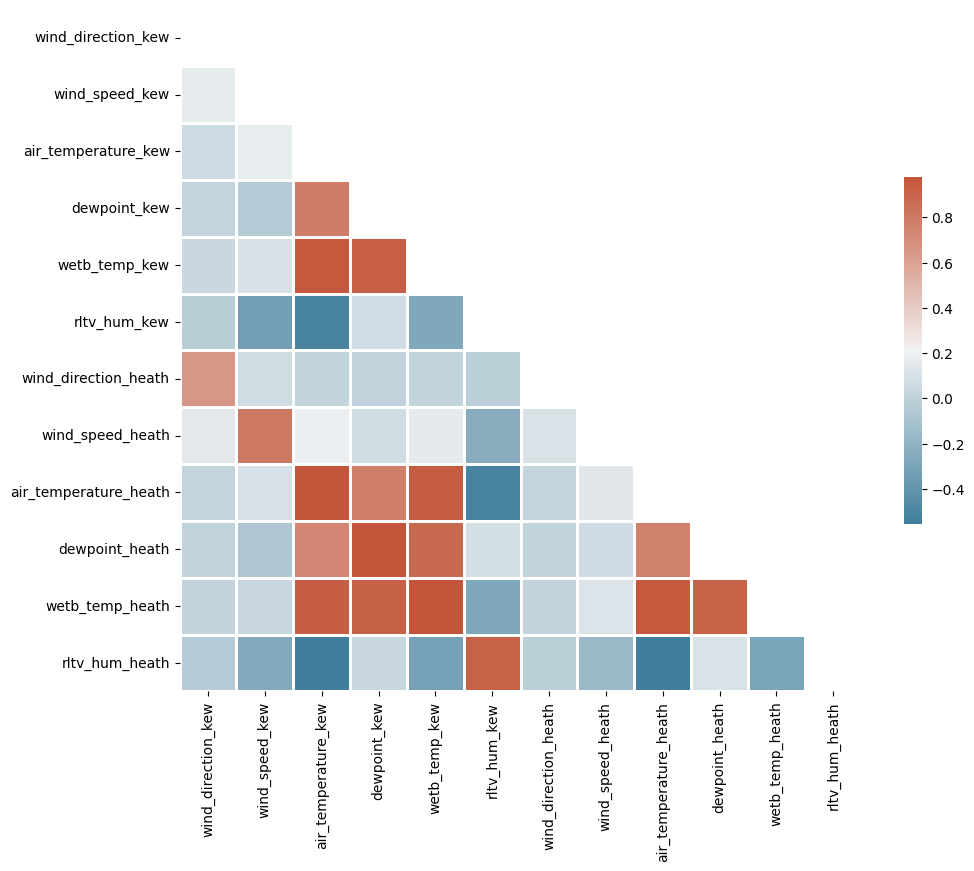

In [8]:
# 4) Examine parameters and plot correlation BEFORE feature engineering

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,
            linewidths=.9, cbar_kws={"shrink": .5})
#sns.heatmap(corr, mask=mask, cmap=cmap, square=True, center=0, linewidths=.9, cbar_kws={"shrink": .5}, annot=True)


In [12]:
# 5) feature engineering
wv_kew = df.pop('wind_speed_kew')
wd_rad_kew = df.pop('wind_direction_kew') * np.pi / 180
df['Wx_kew'] = wv_kew*np.cos(wd_rad_kew)
df['Wy_kew'] = wv_kew*np.sin(wd_rad_kew)

wv_heath = df.pop('wind_speed_heath')
wd_rad_heath = df.pop('wind_direction_heath') * np.pi / 180
df['Wx_heath'] = wv_heath*np.cos(wd_rad_heath)
df['Wy_heath'] = wv_heath*np.sin(wd_rad_heath)

timestamp_s = df.index.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

<AxesSubplot: >

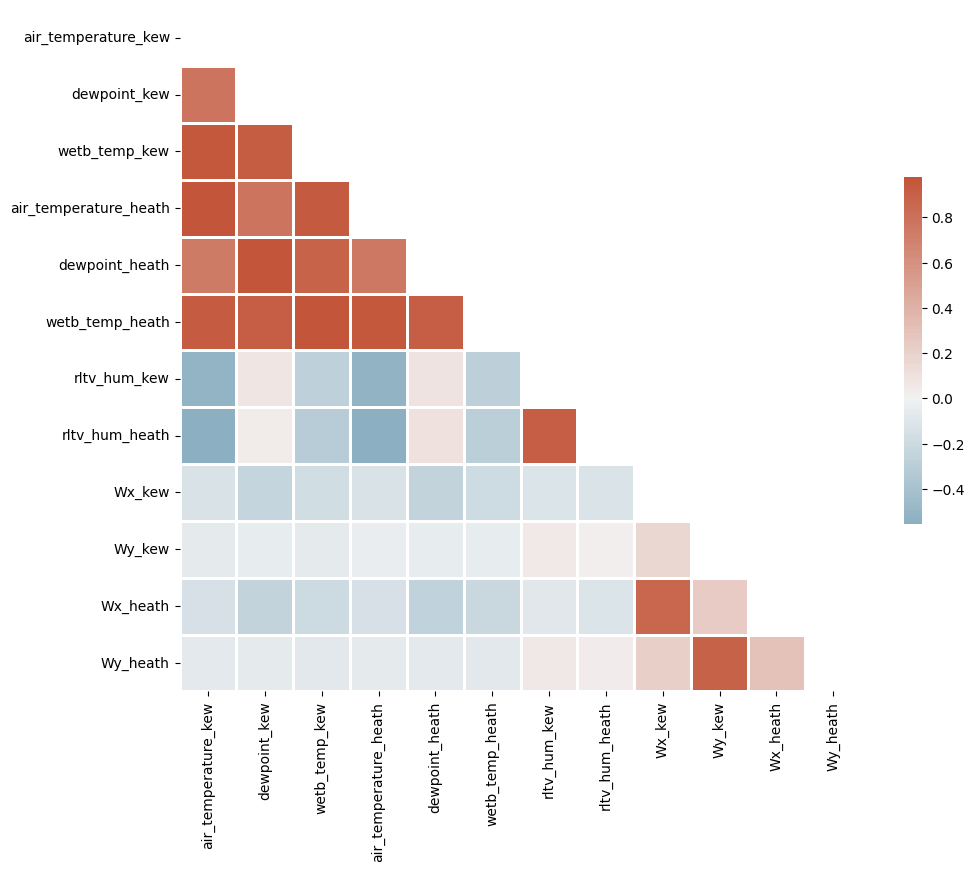

In [13]:
# 6 Select specific features

columns = ['air_temperature_kew', 'dewpoint_kew', 'wetb_temp_kew', 'air_temperature_heath', 'dewpoint_heath', 'wetb_temp_heath', 'rltv_hum_kew', 'rltv_hum_heath', 'Wx_kew', 'Wy_kew', 'Wx_heath', 'Wy_heath']
#columns = ['air_temperature_kew', 'dewpoint_kew', 'wetb_temp_kew', 'air_temperature_heath', 'dewpoint_heath', 'wetb_temp_heath']
#columns = ['air_temperature_kew', 'dewpoint_kew', 'wetb_temp_kew']

df = df[columns]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns.set(font_scale=1.8)
#, annot_kws={'size': 20}
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, center=0, linewidths=.9, cbar_kws={"shrink": .5})

In [14]:
# 7 Resample postprocessed data

df = df.resample("1H").mean()
resample = 1

In [15]:
# 8 Define train, val and test ratios

n = len(df)
train = int(n*0.7)
val = int(n*0.85)
test = len(df)

train, val, test, val-train, test-val

(36825, 44716, 52608, 7891, 7892)

In [16]:
# 9 Normalize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:train, :])
df_scaled = pd.DataFrame(scaler.transform(df))
df_scaled.columns = df.columns
df_scaled.index = df.index


In [17]:
# 10 Window Generator (deducts window_size from full dataset from the beginning e.g. 52608-24 = 52584)

WINDOW_SIZE = int(24 / resample * 7)


def df_to_X_y(df, window_size=WINDOW_SIZE):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)

    label = [r for r in df_as_np[i+window_size]]
    y.append(label)
  return np.array(X), np.array(y)


print('New shape:', n, '-', WINDOW_SIZE, '=', n-WINDOW_SIZE)


New shape: 52608 - 168 = 52440


In [18]:
# 11 Apply window generator (deducts window_size from full dataset from the end e.g. 52608-24 = 52584)
# y is offset by the window size
X, y = df_to_X_y(df_scaled)
X.shape, y.shape


((52440, 168, 12), (52440, 12))

In [19]:
# 12 Split train, val and test

X_train, y_train = X[:train], y[:train]
X_val, y_val = X[train:val], y[train:val]
X_test, y_test = X[val:test], y[val:test]
df.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, len(
    X_train) + len(X_val) + len(X_test)


((52608, 12),
 (36825, 168, 12),
 (36825, 12),
 (7891, 168, 12),
 (7891, 12),
 (7724, 168, 12),
 (7724, 12),
 52440)

In [20]:
# 13 Inverse y_test
y_test = scaler.inverse_transform(y_test)


In [29]:
# 14 Define architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

features = len(df.columns)

model = Sequential()
model.add(InputLayer((WINDOW_SIZE, features)))
model.add(Bidirectional(LSTM(320, activation='tanh')))
model.add(Dense(256, 'relu'))
model.add(Dropout(0.1))
model.add(Dense(features, 'linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 640)               852480    
_________________________________________________________________
dense (Dense)                (None, 256)               164096    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3084      
Total params: 1,019,660
Trainable params: 1,019,660
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 15 Compile

#cp1 = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])
patience = 2
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=patience, mode='min')


In [34]:
# 16 Train
#% % time
# it took 2-3 minutes to train on a GPU thru Colab Pro
history = model.fit(X_train, y_train, validation_data=(
    X_val, y_val), callbacks=[early_stopping], epochs=1, batch_size=4)


9207/9207 [==============================] - 573s 61ms/step - loss: 0.0865 - root_mean_squared_error: 0.2942 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2843


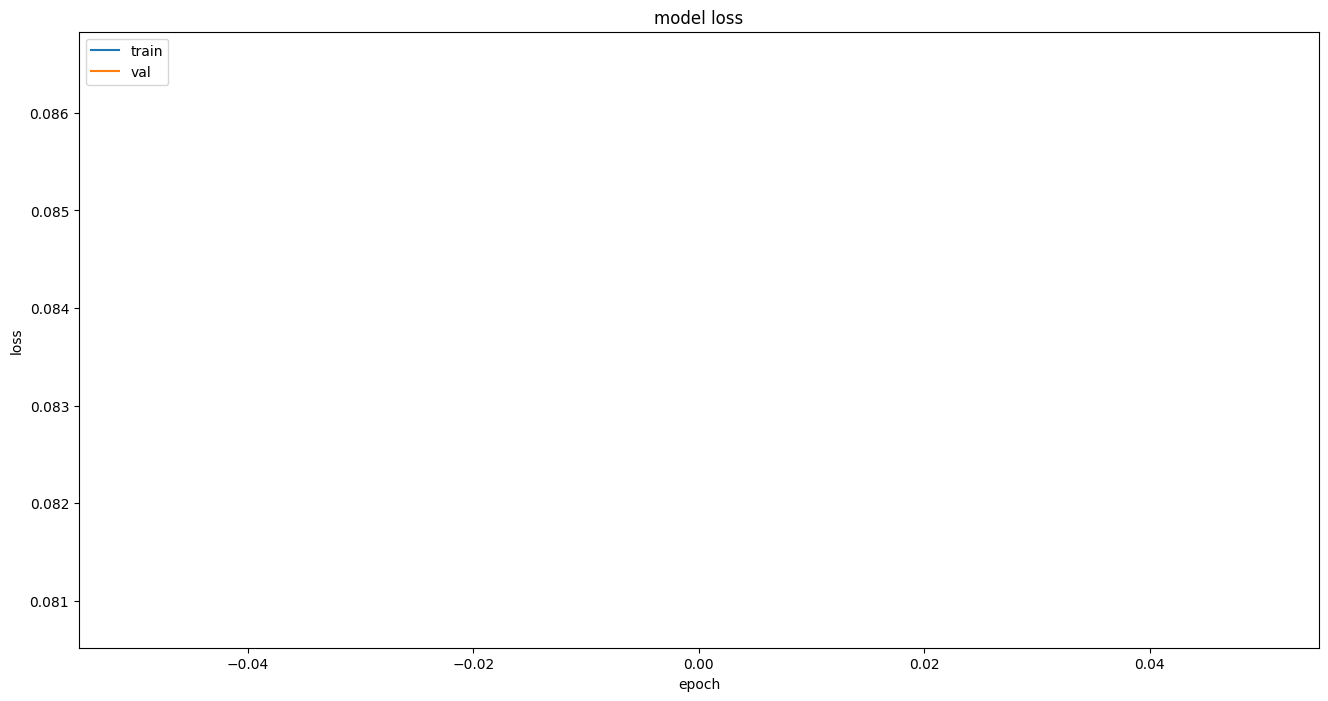

In [35]:
# 17 Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [36]:
# 18a select location and feature
feature = 'Wx_heath'
#rltv_hum_heath
#Wx_kew
feat_pos = df.columns.get_loc(feature)


In [37]:
# 18 Predict y_predict from entire X_test dataset
y_predict = scaler.inverse_transform(model.predict(x=X_test))
y_val_inverse = scaler.inverse_transform(y_val)

print('Number of predicted values from X_test:', y_predict.shape[0])


KeyboardInterrupt: 

In [ ]:
# 19 Plot single point predictions for whole X_test, y_test
plt.rcParams["figure.figsize"] = (18, 4)

#feat_pos = 0
start = 0

plt.plot(y_predict[:, feat_pos], label='Predicted (hourly)', alpha=0.6)
plt.plot(y_test[:, feat_pos], label='True', alpha=0.6)
plt.legend()

RMSE = round(sqrt(mean_squared_error(
    y_predict[:, feat_pos], y_test[:, feat_pos])), 2)
MAE = round(mean_absolute_error(
    y_predict[:, feat_pos], y_test[:, feat_pos]), 2)
l_inf = round(max(np.abs(y_predict[:, feat_pos] - y_test[:, feat_pos])), 2)
plt.title('RMSE:' + str(RMSE) + ' MAE:' + str(MAE) + ' L_inf:' + str(l_inf))

plt.title('Air Temperature Kew Gardens', fontsize=20)
plt.xlabel('Timesteps (hours)', fontsize=14)
plt.ylabel('Temperature (C)', fontsize=14)

RMSE, MAE, l_inf


In [ ]:
# 20 Plot single point predictions for prediction window
plt.rcParams["figure.figsize"] = (18, 6)

#feat_pos = df.columns.get_loc('rltv_hum_kew')
start = 0
window = int(24 / resample)
offset = 0

plt.plot(y_predict[offset:window+offset, feat_pos], label='Hourly (24 steps)')
plt.plot(y_test[:window, feat_pos], label='True')
#plt.plot(y_pred[:,0], label='24 hourly (single step)')
plt.legend()

# RMSE = round(sqrt(mean_squared_error(y_predict[:window,feat_pos], y_test[:window,0])), 2)
# MAE = round(mean_absolute_error(y_predict[:window,feat_pos], y_test[:window,0]), 2)
# l_inf = round(max(np.abs(y_predict[:window,feat_pos] - y_test[:window,0])), 2)

RMSE = round(sqrt(mean_squared_error(
    y_predict[offset:window + offset, feat_pos], y_test[:window, 0])), 2)
MAE = round(mean_absolute_error(
    y_predict[offset:window+offset, feat_pos], y_test[:window, 0]), 2)
l_inf = round(
    max(np.abs(y_predict[offset:window+offset, feat_pos] - y_test[:window, 0])), 2)


#plt.title('RMSE:' + str(RMSE) + ' MAE:' + str(MAE) + ' L_inf:' + str(l_inf))
plt.title('Air Temperature Kew Gardens', fontsize=20)
plt.xlabel('Timesteps (hours)', fontsize=14)
plt.ylabel('Temperature (C)', fontsize=14)


In [ ]:
# 21 Rolling prediction
days = 3

plt.rcParams["figure.figsize"] = (18,4)
window = 24*days
y_pred_scaled = [] 
out_steps = int(24 / resample * days)
start = 0
current_batch = X_test[start:start+1,:,:] #takes first sample, all windows and all features

for i in range(out_steps):
  
  current_pred = model.predict(current_batch).flatten()
  y_pred_scaled.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
 
y_pred_scaled = np.array(y_pred_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled)

plt.rcParams["figure.figsize"] = (8,8)
plt.plot(y_pred[:, feat_pos], label='Predicted Air Temperature', color='green')
plt.plot(y_test[:out_steps, feat_pos], label='True Air Temperature', color='orange')


RMSE = round(sqrt(mean_squared_error(y_pred[offset:window + offset,feat_pos], y_test[:window, feat_pos])), 2)
MAE = round(mean_absolute_error(y_pred[offset:window+offset,feat_pos], y_test[:window, feat_pos]), 2)
l_inf = round(max(np.abs(y_pred[offset:window+offset,feat_pos] - y_test[:window, feat_pos])), 2)

plt.xlabel('Timesteps (hours)', fontsize=14)
plt.ylabel('Temperature (C)', fontsize=14)


plt.title('RMSE:' + str(RMSE) + ' MAE:' + str(MAE) + ' L_inf:' + str(l_inf))
plt.title('Temperature Heathrow',fontsize=20)

plt.legend()
print('total size is',n ,': validation begins at', train, 'and test begins at', val)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(true_list[:, :].reshape(288, 1), pred_list[:,
           :, feat_pos].reshape(288, 1), s=5, alpha=0.3)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Temperature (C)', size=14)
ax.set_ylabel('Predicted Temperature (C)', size=14)
#regression line
r2_test, r2_pred = true_list[:, :].reshape(
    288, 1), pred_list[:, :, feat_pos].reshape(288, 1)
ax.plot(r2_test, LinearRegression().fit(
    r2_test, r2_pred).predict(r2_test), color='orange')
ax.annotate(
    "r-squared = {:.3f}".format(r2_score(r2_test, r2_pred)), (5, 5), size=14)
plt.show()


In [ ]:
# from sklearn.metrics import r2_score
# from sklearn.linear_model import LinearRegression

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.scatter(y_test[:out_steps, feat_pos], y_pred[:, feat_pos], s=5, alpha=0.3)
# #ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual Temperature (C)', size=14)
# ax.set_ylabel('Predicted Temperature (C)', size=14)
# #regression line
# r2_test, r2_pred = y_test[:out_steps, feat_pos].reshape(-1,1), y_pred[:, feat_pos].reshape(-1,1)
# ax.plot(r2_test, LinearRegression().fit(r2_test, r2_pred).predict(r2_test), color='orange')
# ax.annotate("r-squared = {:.3f}".format(r2_score(r2_test, r2_pred)), (5,5), size=14)
# plt.show()


In [ ]:
# # 21 Rolling prediction

# plt.rcParams["figure.figsize"] = (18,4)
# window = 24*7
# y_pred_scaled = [] 
# out_steps = int(24 / resample * 7)
# start = 0
# current_batch = X_test[start:start+1,:,:] #takes first sample, all windows and all features

# for i in range(out_steps):
  
#   current_pred = model.predict(current_batch).flatten()
#   y_pred_scaled.append(current_pred)
#   current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
 
# y_pred_scaled = np.array(y_pred_scaled)
# y_pred = scaler.inverse_transform(y_pred_scaled)

# plt.plot(y_pred[:,0], label='Predicted Air Temperature Kew Gardens')
# plt.plot(y_test[:out_steps, 0], label='True Air Temperature Kew Gardens')


# RMSE = round(sqrt(mean_squared_error(y_pred[offset:window + offset,feat_pos], y_test[:window,0])), 2)
# MAE = round(mean_absolute_error(y_pred[offset:window+offset,feat_pos], y_test[:window,0]), 2)
# l_inf = round(max(np.abs(y_pred[offset:window+offset,feat_pos] - y_test[:window,0])), 2)


# plt.title('RMSE:' + str(RMSE) + ' MAE:' + str(MAE) + ' L_inf:' + str(l_inf))
# plt.legend()
# print('total size is',n ,': validation begins at', train, 'and test begins at', val)

In [ ]:
# 20) Input and output single shot prediction

import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (18, 4)
#feat_pos = df.columns.get_loc('rltv_hum_kew')

# X_train, y_train = X[:train], y[:train]
# X_val, y_val = X[train:val], y[train:val]
# X_test, y_test = X[val:], y[val:]

# true data and indicies for plotting input window
#window_in = df.iloc[val-WINDOW_SIZE:val, 0]
window_in = y_val_inverse[-WINDOW_SIZE:, feat_pos]
indices_in = df.index[val - WINDOW_SIZE:val]

# indicies for plotting input window
indices_out = df.index[val: val + out_steps]


fig, ax = plt.subplots()

# input
ax.scatter(x=indices_in, y=window_in, label='Input Window',
           alpha=0.5, edgecolors='none', s=80)

# true output
ax.scatter(x=indices_out, y=y_test[:out_steps, feat_pos],
           label='True', c='orange', alpha=0.5, edgecolors='none', s=80)

#predicted output
ax.scatter(x=indices_out, y=y_pred[:, feat_pos], label='LSTM Prediction',
           c='green', alpha=0.8, edgecolors='none', s=80, marker='x')

#predicted output
#ax.scatter(x=indices_out, y=naive, label='Baseline Prediction', c='black', alpha=0.4, edgecolors='none', s=80, marker='h')

RMSE = round(sqrt(mean_squared_error(
    y_pred[:, feat_pos], y_test[:out_steps, feat_pos])), 2)
MAE = round(mean_absolute_error(
    y_pred[:, feat_pos], y_test[:out_steps, feat_pos]), 2)
l_inf = round(
    max(np.abs(y_pred[:, feat_pos] - y_test[:out_steps, feat_pos])), 2)


#plt.title('RMSE:' + str(RMSE) + ' , MAE:' + str(MAE) + ' , L_inf:' + str(l_inf))
plt.title('Air Temperature Kew Gardens', fontsize=20)
#plt.xlabel('Date Time')
plt.ylabel('Temperature (C)', fontsize=20)
plt.xticks(rotation=45, )
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H %d/%m/%Y'))


ax.legend()
plt.show()


In [ ]:
# 21) Four season rolling prediction

pred_list = []
true_list = []
out_steps = 24*days
mul = 90
error_list = []

for start in range(0, 96*mul, 24*mul):
  y_pred_scaled = []
  # takes first sample, all windows and all features
  current_batch = X_test[start:start+1, :, :]

  for i in range(out_steps):

    current_pred = model.predict(current_batch).flatten()
    y_pred_scaled.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [
                              [current_pred]], axis=1)

  y_pred_scaled = np.array(y_pred_scaled)
  y_pred = scaler.inverse_transform(y_pred_scaled)
  pred_list.append(y_pred)
  true_list.append(y_test[start: start + out_steps, feat_pos])
  #true_list.append(df['air_temperature_kew'][val + start:val + out_steps + start].values)

  RMSE = round(sqrt(mean_squared_error(
      y_pred[:, feat_pos], y_test[start: start + out_steps, feat_pos])), 2)
  MAE = round(mean_absolute_error(
      y_pred[:, feat_pos], y_test[start: start + out_steps, feat_pos]), 2)
  l_inf = round(
      max(np.abs(y_pred[:, feat_pos] - y_test[start: start + out_steps, feat_pos])), 2)

  error_list.append(['RMSE:', RMSE, 'MAE:', MAE, 'l_inf:', l_inf])

pred_list = np.array(pred_list)
true_list = np.array(true_list)

position = []
for start in range(0, 96*mul, 24*mul):
  position.append(start)


In [ ]:
from numpy.core.fromnumeric import size
# 22) Four season rolling plot

plt.rcParams["figure.figsize"] = (12, 8)

pred = y_pred[:, feat_pos]
true = df[feature][val + start:val + out_steps + start].values
x = list(range(out_steps))

fig, axs = plt.subplots(2, 2, sharey=True)
fig.suptitle('Relative Humidity', size=22)

axs[0, 0].plot(x, pred_list[0, :, feat_pos], 'x',
               c='green', alpha=0.8, label='yes')
axs[0, 0].plot(x, true_list[0, :], 'o', c='orange', alpha=0.5, label='no')
#axs[0, 0].set_title('Offset of ' + str(position[0]/24) + ' days \n' + str(error_list[0]))
axs[0, 0].set_title('Winter')


axs[0, 1].plot(x, pred_list[1, :, feat_pos], 'x', c='green', alpha=0.8)
axs[0, 1].plot(x, true_list[1, :], 'o', c='orange', alpha=0.5)
#axs[0, 1].set_title('Offset of ' + str(position[1]/24) + ' days \n' + str(error_list[1]))
axs[0, 1].set_title('Spring')

axs[1, 0].plot(x, pred_list[2, :, feat_pos], 'x', c='green', alpha=0.8)
axs[1, 0].plot(x, true_list[2, :], 'o', c='orange', alpha=0.5)
#axs[1, 0].set_title('Offset of ' + str(position[2]/24) + ' days \n' + str(error_list[2]))
axs[1, 0].set_title('Summer')

axs[1, 1].plot(x, pred_list[3, :, feat_pos], 'x', c='green', alpha=0.8)
axs[1, 1].plot(x, true_list[3, :], 'o', c='orange', alpha=0.5)
#axs[1, 1].set_title('Offset of ' + str(position[3]/24) + ' days \n' + str(error_list[3]))
axs[1, 1].set_title('Autumn')

for ax in axs.flat:
    ax.set(xlabel='Timestep (hour)', ylabel='Longitudinal Wind Speed (m/s)')


# Hide x labels and tick labels for top plots and y ticks for right plots.


for ax in axs.flat:
    ax.label_outer()

#plt.legend(axs[0, 0],"HHZ 1")

plt.show()
